In [51]:

# used for manipulating directory paths
import os

# import utils 
# from util import Util
# u = Util()

# Data visualisation & manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import shutil
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from pathlib import Path
import seaborn as sns

# Specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import numpy as np 

# Plotting library
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# dl libraries specifically for CNN
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras import layers
from keras import models
from keras import optimizers

# import the Image module of PIL into the shell:
# pip install Pillow
# pip install opencv-python
from PIL import Image
from skimage.io import imread
import cv2

# tells matplotlib to embed plots within the notebook
%matplotlib inline

import math

Number of types of flowers:  5
Types of flowers:  ['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']
Total number of flowers in the dataset:  3459
Flowers in each category: 
tulip        984
rose         784
daisy        769
sunflower    734
dandelion    188
Name: category, dtype: int64


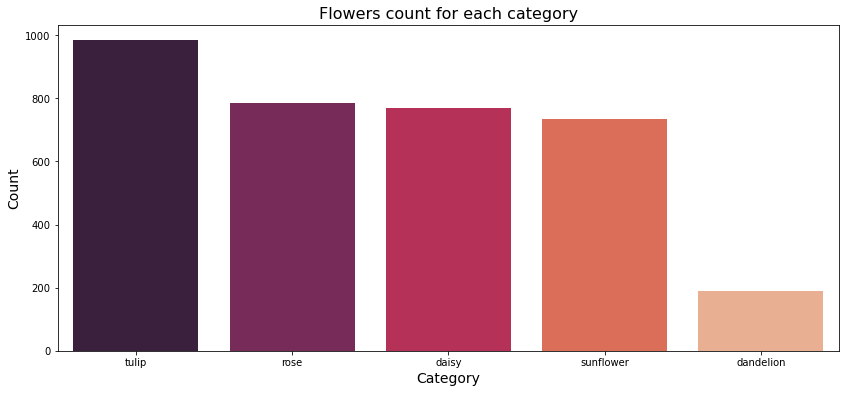

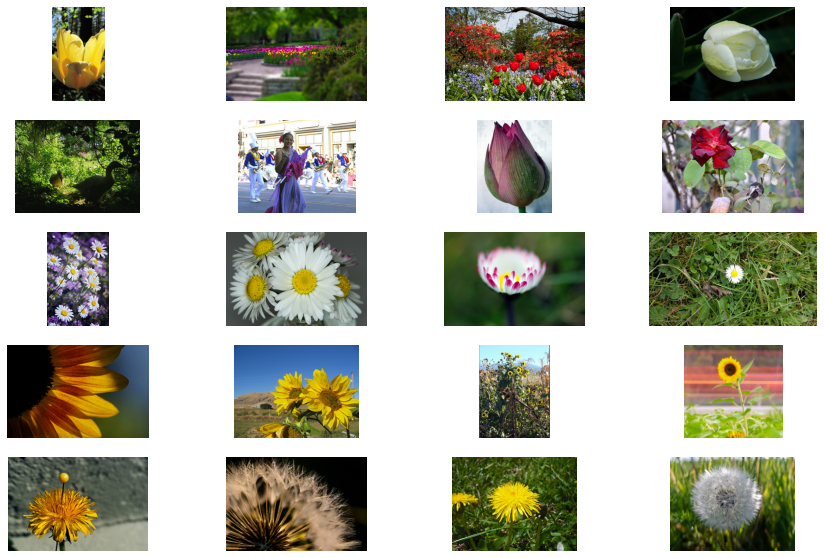

In [52]:
# Importing, analyzing, & preparing the data set, create basic structure in python

# Original dataset folder
# inputPath = Path('/')

flowersPath = Path('flowersData')

# Each species of flower is contained in a separate folder, & this is to get all the sub-directories
flowers = os.listdir(flowersPath)
print("Number of types of flowers: ", len(flowers))
print("Types of flowers: ", flowers)

# Input data files are available in the read-only "../input/" directory
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# A list which contains tuples, the type of flower and the corresponding image path
flowersList = []

for species in flowers:
    # Get all the file names
    allFlowers = os.listdir(flowersPath / species)
    # Add them to the list
    for flower in allFlowers:
        flowersList.append((species, str(flowersPath /species) + '/' + flower))

# Build a dataframe        
flowersList = pd.DataFrame(data=flowersList, columns=['category', 'image'], index=None)
flowersList.head()


# Let's check how many samples for each category are present
print("Total number of flowers in the dataset: ", len(flowersList))
flowerNum = flowersList['category'].value_counts()
print("Flowers in each category: ")
print(flowerNum)



# # Let's do some visualization and see how many samples we have for each category
f, axe = plt.subplots(1,1,figsize=(14,6))
sns.barplot(x = flowerNum.index, y = flowerNum.values, ax = axe, palette="rocket")
axe.set_title("Flowers count for each category", fontsize=16)
axe.set_xlabel('Category', fontsize=14)
axe.set_ylabel('Count', fontsize=14)
plt.show()


# A list for storing names of some random samples from each category
RanSamples = []

# Get samples fom each category 
for category in flowerNum.index:
    samples = flowersList['image'][flowersList['category'] == category].sample(4).values
    for sample in samples:
        RanSamples.append(sample)

# Plot the samples
f, ax = plt.subplots(5,4, figsize=(15,10))
for i,sample in enumerate(RanSamples):
    ax[i//4, i%4].imshow(mimg.imread(RanSamples[i]))
    ax[i//4, i%4].axis('off')
plt.show()

In [55]:
# convert image to pixels, print the pixels
def convert_pix_matrix(imageUrl):
    pix_val = imread(imageUrl)
    return pix_val

def heightWidth(imageUrl,heightWidth):
    im = Image.open(imageUrl)
    h, w = im.size
    if (heightWidth == "width"):
        return w
    else:
        return h
    
# first example from rand sample
print("image width: ", heightWidth(RanSamples[0],"width"))
print("image height: ", heightWidth(RanSamples[0],"height"))
print(convert_pix_matrix(RanSamples[0]))

# read the pixels and conver back to image
def readPixel(pixel):
    img = Image.fromarray(pixel)
    img.save('readPxielExample.png')
    img.show()
    
readPixel(convert_pix_matrix(RanSamples[1]))



image width:  240
image height:  134
[[[161 209 255]
  [137 197 251]
  [125 189 225]
  ...
  [131 170  61]
  [120 165  48]
  [113 159  34]]

 [[138 197 255]
  [118 194 243]
  [ 75 141 165]
  ...
  [ 96 126  56]
  [ 83 112  48]
  [ 81 110  46]]

 [[125 192 247]
  [ 86 152 184]
  [ 25  65  73]
  ...
  [ 67  87  38]
  [ 58  73  40]
  [ 61  75  49]]

 ...

 [[ 69  83  47]
  [ 60  74  39]
  [ 44  58  25]
  ...
  [ 12  13   8]
  [ 11  12   7]
  [ 11  11   9]]

 [[ 63  83  32]
  [ 85 105  52]
  [ 88 111  55]
  ...
  [ 18  19  14]
  [ 17  18  13]
  [ 12  13   8]]

 [[ 74  98  40]
  [ 89 115  52]
  [ 98 125  56]
  ...
  [ 20  21  15]
  [ 18  19  13]
  [ 10  11   6]]]
